In [115]:
"""Need to find the script that generated these results, or redo the analysis.
Now it is based on some script I could not find anymore"""

%cd /home/plent/Documenten/Gitlab/Coumaric_Acid_V2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

combination_experiment=["ARO4","PHA2","FBA1","RKI1","YHM2","C4H","PAL1","ARO2"]
fi_xgb_weights=["ARO4","PHA2","C4H","ZWF1","RKI1","GND2","ENO2","ARO8"]

gene_rankings = {
    "Combination Experiment": ["ARO4", "PHA2", "FBA1", "RKI1", "YHM2"],
    "FI (XGBoost) - Weights": ["ARO4", "PHA2", "C4H", "ZWF1", "RKI1"],
    "FI (XGBoost) - Gain": ["CPR1", "C4H", "PHA2", "ARO2", "ARO4"],
    "SHAP": ["C4H", "ARO4", "PAL1", "RKI", "CPR1"],
    "Our Method": ["ARO4", "YHM2", "PAL1", "C4H", "ARO2"]}



df_rankings = pd.DataFrame(gene_rankings,index=range(1,6))
genes_list = df_rankings.values.flatten()
df_counts = pd.DataFrame(0, columns=np.arange(1, 6), index=sorted(set(genes_list)))


/home/plent/Documenten/Gitlab/Coumaric_Acid_V2


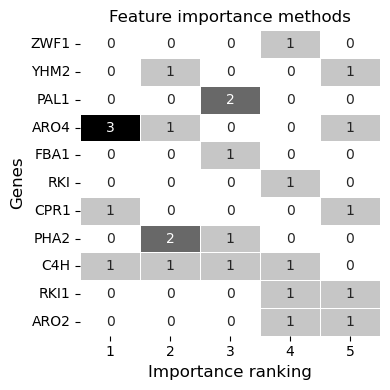

In [134]:
# Convert the gene rankings into a DataFrame with rankings (1 to 8) as rows
df_rankings = pd.DataFrame(gene_rankings, index=range(1, 6))
df_rankings = df_rankings.iloc[0:5,:]

# Create a dictionary to store counts of occurrences
gene_counts = {gene: {i: 0 for i in range(1, 6)} for gene in set(np.concatenate(list(gene_rankings.values())))}

# Iterate over each method's rankings and count occurrences of each gene at each rank
for rank in range(1, 6):  # for each rank (1-8)
    for method, rankings in gene_rankings.items():
        gene_at_rank = rankings[rank - 1]  # Get the gene at the current rank for the method
        gene_counts[gene_at_rank][rank] += 1  # Increment the count for that gene at that rank

# Convert the gene_counts dictionary into a DataFrame
df_counts = pd.DataFrame(gene_counts)

# Generate the heatmap using seaborn

# Create the figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Generate the heatmap on the given axis
sns.heatmap(df_counts.T, annot=True, cmap="Greys", cbar=False, fmt="d", linewidths=0.5, ax=ax)

# Set the title and axis labels
ax.set_title("Feature importance methods", fontsize=12)
ax.set_xlabel("Importance ranking", fontsize=12)
ax.set_ylabel("Genes", fontsize=12)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()
fig.savefig("figures/MachineLearning/heatmap_feature_importance.png",bbox_inches="tight")
fig.savefig("figures/MachineLearning/heatmap_feature_importance.svg",bbox_inches="tight")